Inverse network with 20 output unit was fitted in Liu(2018). \
They used 100k training samples.

Noting that search space is large, (2^20 = 1M) \
I reduce output unit size to 6 and try to replicate the work.

2^4 = 16 \
8^4 = 4k \
2^6 = 64 \
8^6 = 200k \
2^8 = 256 \
8^8 = 16M 

In [2]:
import inverse_design

## Test run

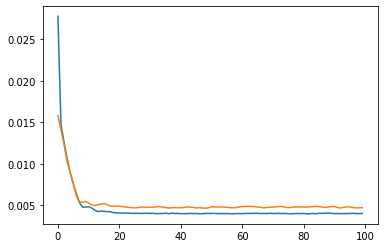

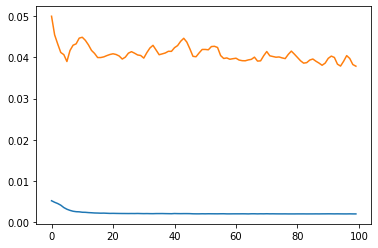

Forward prediction
Input structure : [3.80e-08 1.50e-07 1.22e-07 6.60e-08]


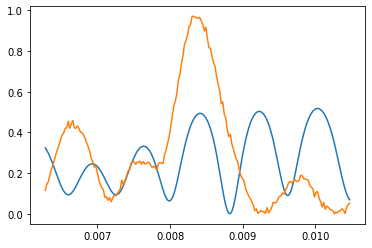

Possible structure : [38.0, 150.0, 122.0, 66.0]
Output structure : [103.0, 76.5, 102.7, 106.2]


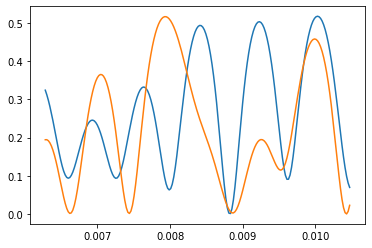

INFO:tensorflow:Assets written to: models/model_foward_b896d787bdb61e4c4ef8a7442a708a5f_test/assets
INFO:tensorflow:Assets written to: models/model_backward_b896d787bdb61e4c4ef8a7442a708a5f_test/assets
INFO:tensorflow:Assets written to: models/model_inverse_b896d787bdb61e4c4ef8a7442a708a5f_test/assets


In [4]:
config = {
    "simulation_count" : 1000,
    "layer_count" : 4,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)
df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.1, plot=False)
inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=100)
inv.show_history()
inv.test(df)
inv.save_model("test")

## Inverse design with 10k search

In [ ]:
config = {
    "simulation_count" : 10000,
    "layer_count" : 6,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)
# df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.1, plot=False)
inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=1000)
inv.show_history()
inv.test(df)
inv.save_model("D0010_S0010_E0001") #parameter space size, search space size, train epoch

  0%|          | 0/10000 [00:00<?, ?it/s]

## Inverse design with filtered 1k search

In [ ]:
config = {
    "simulation_count" : 10000,
    "layer_count" : 6,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)
df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.1, plot=False)
inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=1000)
inv.show_history()
inv.test(df)
inv.save_model("D0010_S0001_E0001") #parameter space size, search space size, train epoch

## inverse design with filtered 10k search

In [ ]:
config = {
    "simulation_count" : 100000,
    "layer_count" : 6,
    "spectral_range" : (0.15,0.25),
    "spectral_resolution" : 200,
    "n1":1.4,
    "n2":2.1,
    "d_min":10e-9,
    "d_max":150e-9
}
df = inverse_design.calculate_spectrum_all(config)
# split reduce due to memory issue
df_1 = inverse_design.filter_similar_spectrum(config, df.iloc[     :20000,:], thres_ratio = 0.2, plot=False)
df_2 = inverse_design.filter_similar_spectrum(config, df.iloc[20000:40000,:], thres_ratio = 0.2, plot=False)
df_3 = inverse_design.filter_similar_spectrum(config, df.iloc[40000:60000,:], thres_ratio = 0.2, plot=False)
df_4 = inverse_design.filter_similar_spectrum(config, df.iloc[60000:80000,:], thres_ratio = 0.2, plot=False)
df_5 = inverse_design.filter_similar_spectrum(config, df.iloc[80000:     ,:], thres_ratio = 0.2, plot=False)
df = pd.concat(df_1,df_2,df_3,df_4,df_5)
df = inverse_design.filter_similar_spectrum(config, df, thres_ratio = 0.5, plot=False)

inv = inverse_design.inverse_model(config)
inv.train(df, train_epochs=1000)
inv.show_history()
inv.test(df)
inv.save_model("D0100_S0010_E0001") #parameter space size, search space size, train epoch